## SP901 Data Science and Machine Learning Using Python

### 3.3.1 Unsupervised Learning

#### Instruction:

Using the IRIS dataset, create the following algorithms:
- **Kmeans**
- **DBSCAN**
- **Hierarchical**

After that, compare results using ARI and Sillhouette Score.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#### Load Data

In [2]:
# Load the Iris dataset
iris = load_iris()
data = iris.data
target = iris.target

#### Standardize Data

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#### K-Means Clustering

In [ ]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

#### DBSCAN Clustering

In [ ]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

#### Hierarchical Clustering

In [ ]:
# Perform Hierarchical clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

#### Cluster Evaluation using ARI and Silhouette Score

In [ ]:
# Evaluate clustering results
ari_kmeans = adjusted_rand_score(target, kmeans_labels)
ari_dbscan = adjusted_rand_score(target, dbscan_labels)
ari_hierarchical = adjusted_rand_score(target, hierarchical_labels)

silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)
silhouette_dbscan = silhouette_score(data_scaled, dbscan_labels)
silhouette_hierarchical = silhouette_score(data_scaled, hierarchical_labels)

#### Display Result

C:\ProgramData\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      Algorithm       ARI  Silhouette Score
0        KMeans  0.620135          0.459948
1        DBSCAN  0.442099          0.356516
2  Hierarchical  0.615323          0.446689


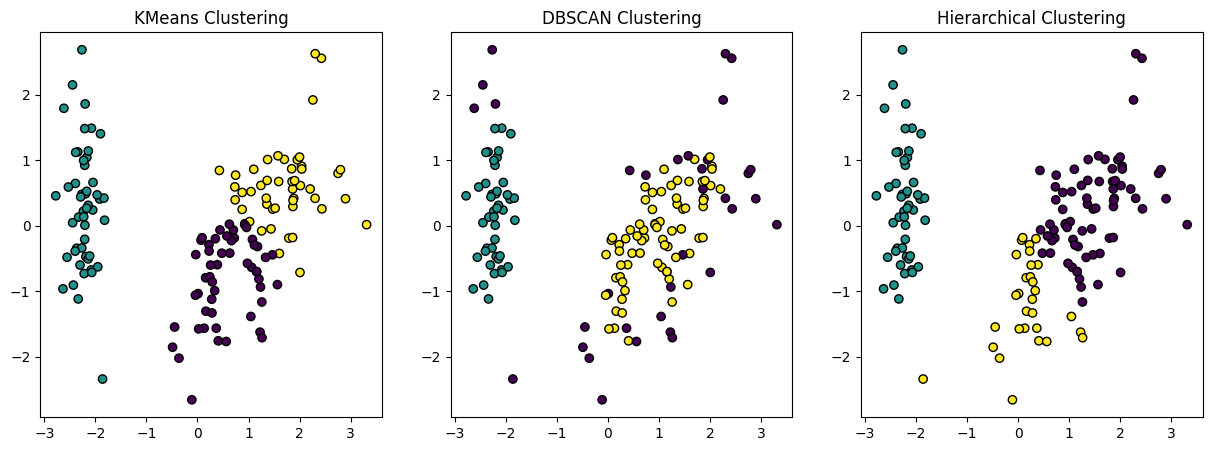

In [1]:
# Display results
results = pd.DataFrame({
    'Algorithm': ['KMeans', 'DBSCAN', 'Hierarchical'],
    'ARI': [ari_kmeans, ari_dbscan, ari_hierarchical],
    'Silhouette Score': [silhouette_kmeans, silhouette_dbscan, silhouette_hierarchical]
})

print(results)

# Visualize clustering results using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k')
plt.title('KMeans Clustering')

plt.subplot(1, 3, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k')
plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hierarchical_labels, cmap='viridis', edgecolor='k')
plt.title('Hierarchical Clustering')

plt.show()


#### Summary: 

A higher ARI indicates better agreement with the true labels. In this case, KMeans and Hierarchical clustering show relatively higher ARI values compared to DBSCAN.

Silhouette Score measures how well-defined the clusters are. Again, KMeans and Hierarchical clustering have higher Silhouette Scores, suggesting well-defined clusters.